# SGD Classifier
-----
This section tries SGD Classifier on the problem in the hand. The planning document suggested that SVM will be used as second classifier. However, SVN keeps running forever. **SGD** Classifier with **loss** parameter set to **hinge** behaves as **Linear SVM**.

In [1]:
# First thing first - bring necessary modules in
%matplotlib inline
# a utility project level module for
# loading samples and plotting data
import project_utils as pu
# a utility project level module
# for classification
import model_utils as mu
# numpy and pandas
import numpy as np
import pandas as pd
# plots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load sample with 50-50 (pos-neg) balance
df_50 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.5)
# Load sample with 33-66 (pos-neg) balance
df_33 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.33)
# Load sample with 20-80 (pos-neg) balance
df_20 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.2)

In [23]:
# Workout X and y for different samples
X50 = df_50[pu.x_columns].values
y50 = (df_50.click > 0).values
X33 = df_33[pu.x_columns].values
y33 = (df_33.click > 0).values
X20 = df_20[pu.x_columns].values
y20 = (df_20.click > 0).values

In [3]:
# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_50[pu.x_columns].values, 
                                              (df_50.click > 0).values, random_state=5)

Trying **Linear SVM**.

In [ ]:
#from sklearn import svm
#from sklearn.linear_model import SGDClassifier
# clf_svm_50, Xtrain_svm_50, ytrain_svm_50, Xtest_svm_50, ytest_svm_50  = mu.do_classify(svm.SVC(kernel='linear'), 
#                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
#                                                           df_50, pu.x_columns, 'click', 0)

## SGD Classifier with do_classify

In [14]:
clf_sgd_50, Xtrain_sgd_50, ytrain_sgd_50, Xtest_sgd_50, ytest_sgd_50  = mu.do_classify(
                                                           SGDClassifier(loss='hinge'), 
                                                           {"alpha": [0.01, 0.1, 1, 10, 100],
                                                            "n_iter": [50, 80, 100, 120, 150]}, 
                                                           df_50, pu.x_columns, 'click', 0)

BEST PARAMS {'alpha': 1, 'n_iter': 120}
Accuracy on training data: 0.50
Accuracy on test data:     0.50


In [12]:
clf_sgd_33, Xtrain_sgd_33, ytrain_sgd_33, Xtest_sgd_33, ytest_sgd_33  = mu.do_classify(
                                                           SGDClassifier(loss='hinge'), 
                                                           {"alpha": [0.01, 0.1, 1, 10, 100],
                                                            "n_iter": [100, 120, 150]}, 
                                                           df_33, pu.x_columns, 'click', 0)

BEST PARAMS {'alpha': 1, 'n_iter': 120}
Accuracy on training data: 0.46
Accuracy on test data:     0.46


In [16]:
clf_sgd_20, Xtrain_sgd_20, ytrain_sgd_20, Xtest_sgd_20, ytest_sgd_20  = mu.do_classify(
                                                           SGDClassifier(loss='hinge'), 
                                                           {"alpha": [0.01, 0.1, 1, 10, 100],
                                                            "n_iter": [100, 150, 200]}, 
                                                           df_20, pu.x_columns, 'click', 0)

BEST PARAMS {'alpha': 10, 'n_iter': 200}
Accuracy on training data: 0.80
Accuracy on test data:     0.80


## SGD Accuracy Score:

The above results look very different from [LogisticRegression Classifier](project_lr.ipynb#Logistic-Regression-with-do_classify). SGD50 classifier has better accuracy score. Let's see the accuracy score of different SGD Classifiers with Xtest and ytest data.

In [21]:
print("Accuracy Score ytest: %f" % accuracy_score(clf_sgd_50.predict(Xtest), ytest))
print("Accuracy Score ytest: %f" % accuracy_score(clf_sgd_33.predict(Xtest), ytest))
print("Accuracy Score ytest: %f" % accuracy_score(clf_sgd_20.predict(Xtest), ytest))

Accuracy Score ytest: 0.492852
Accuracy Score ytest: 0.492110
Accuracy Score ytest: 0.498837


The accuracy score looks stunningly similar. Next Let's look at confusion matrix scores.

## SGD Confusion Matrix:

In [19]:
print(confusion_matrix(ytest_sgd_50, clf_sgd_50.predict(Xtest_sgd_50)))

[[7193  969]
 [7075  935]]


In [20]:
print(confusion_matrix(ytest_sgd_33, clf_sgd_33.predict(Xtest_sgd_33)))
print(confusion_matrix(ytest_sgd_20, clf_sgd_20.predict(Xtest_sgd_20)))
# try test data generated for SGD50 classifier with SGD33 classifier 
print(confusion_matrix(ytest_sgd_50, clf_sgd_33.predict(Xtest_sgd_50)))
# try test data generated for SGD50 classifier with SGD20 classifier
print(confusion_matrix(ytest_sgd_50, clf_sgd_20.predict(Xtest_sgd_50)))

[[4235 6572]
 [2132 3233]]
[[12952     0]
 [ 3220     0]]
[[3232 4930]
 [3148 4862]]
[[8162    0]
 [8010    0]]


In [22]:
print(confusion_matrix(ytest, clf_sgd_50.predict(Xtest)))
print(confusion_matrix(ytest, clf_sgd_33.predict(Xtest)))
print(confusion_matrix(ytest, clf_sgd_20.predict(Xtest)))

[[8860 1224]
 [9028 1103]]
[[3884 6200]
 [4067 6064]]
[[10084     0]
 [10131     0]]


### Analysis:
From the above results it can be confirmed that SGD20 suffers from False Positive. SGD50 and SGD33 classifiers have a very close accuracy score but confusion matrix results seem very different.

## SGD Data Projection:

### SGD50 Data Projection:

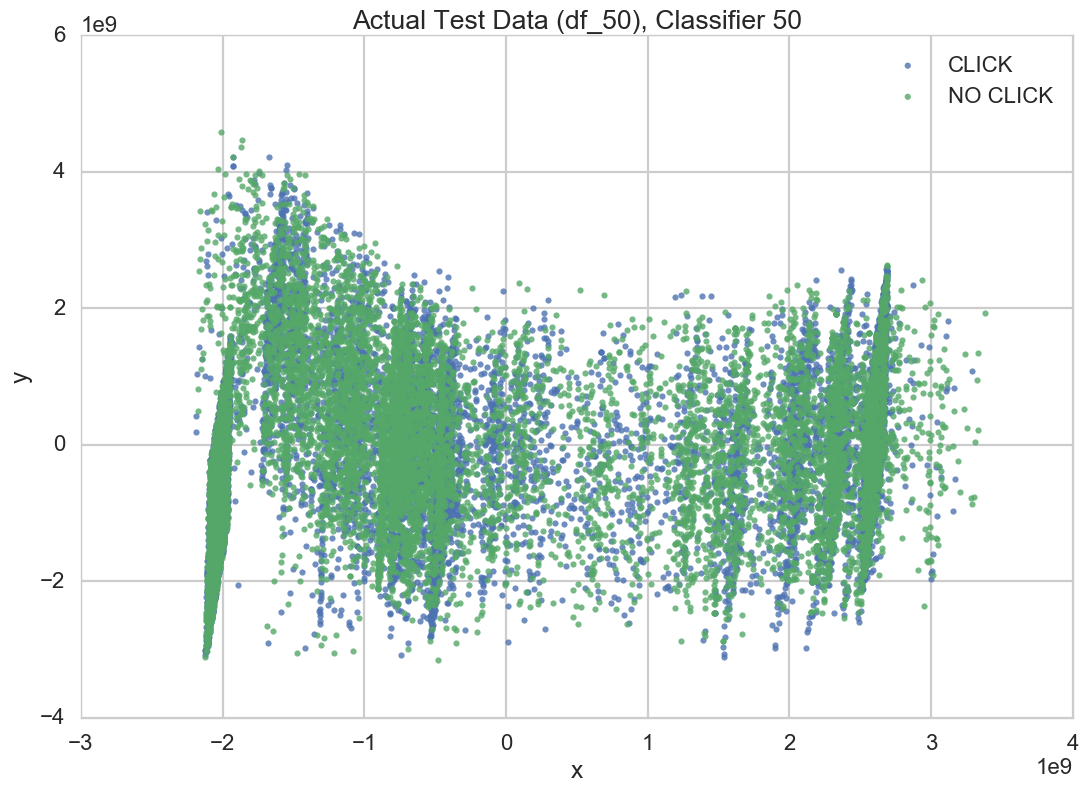

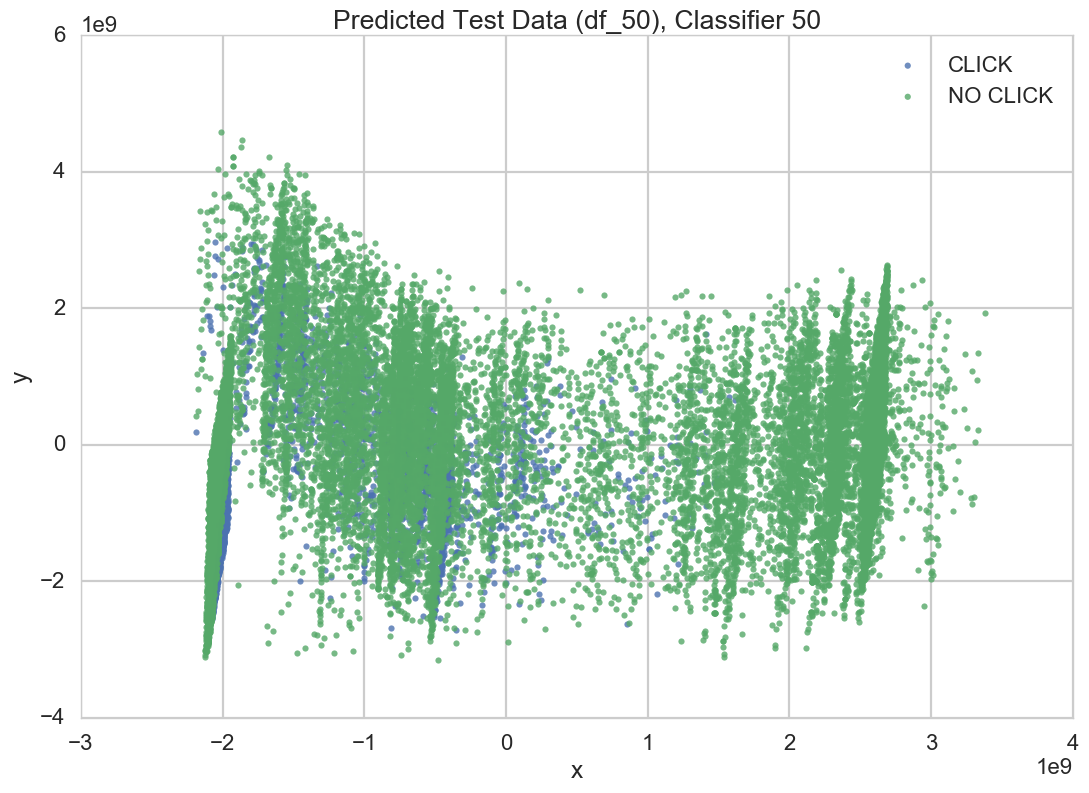

In [24]:
pu.plot_distribution(Xtest, ytest, clf_sgd_50, predicted=False, title="Actual Test Data (df_50), Classifier 50")
pu.plot_distribution(Xtest, ytest, clf_sgd_50, predicted=True, title="Predicted Test Data (df_50), Classifier 50")

### SGD33 Data Projection:

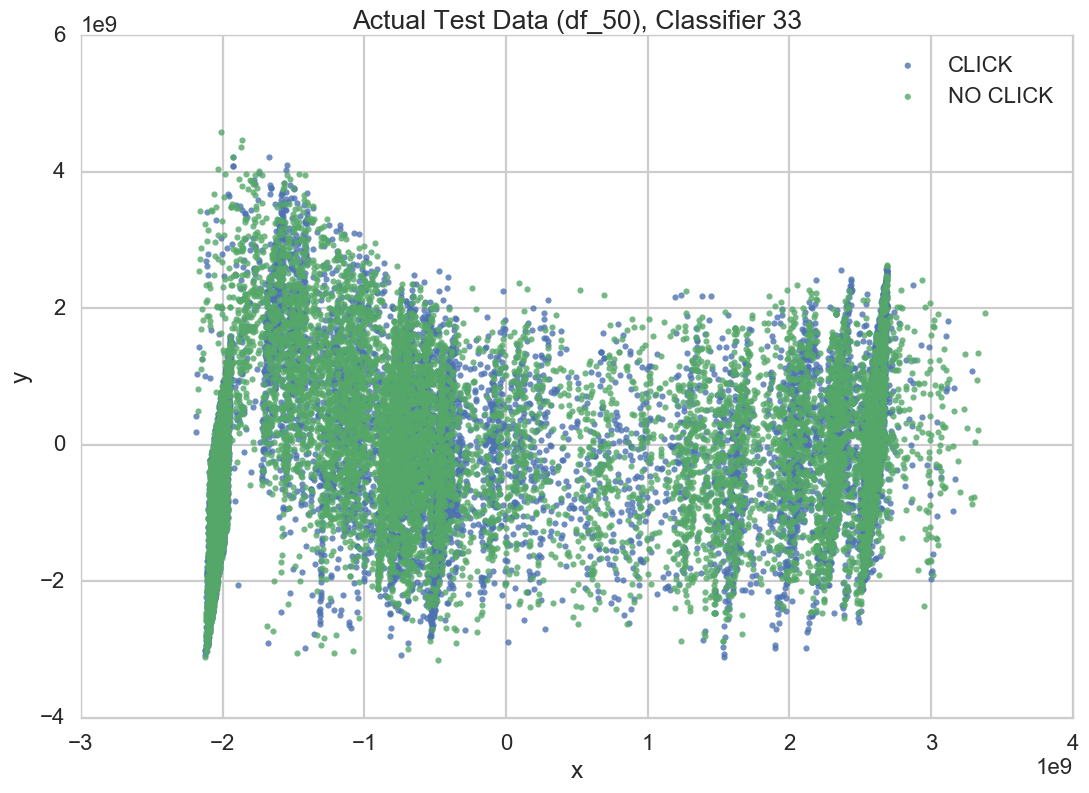

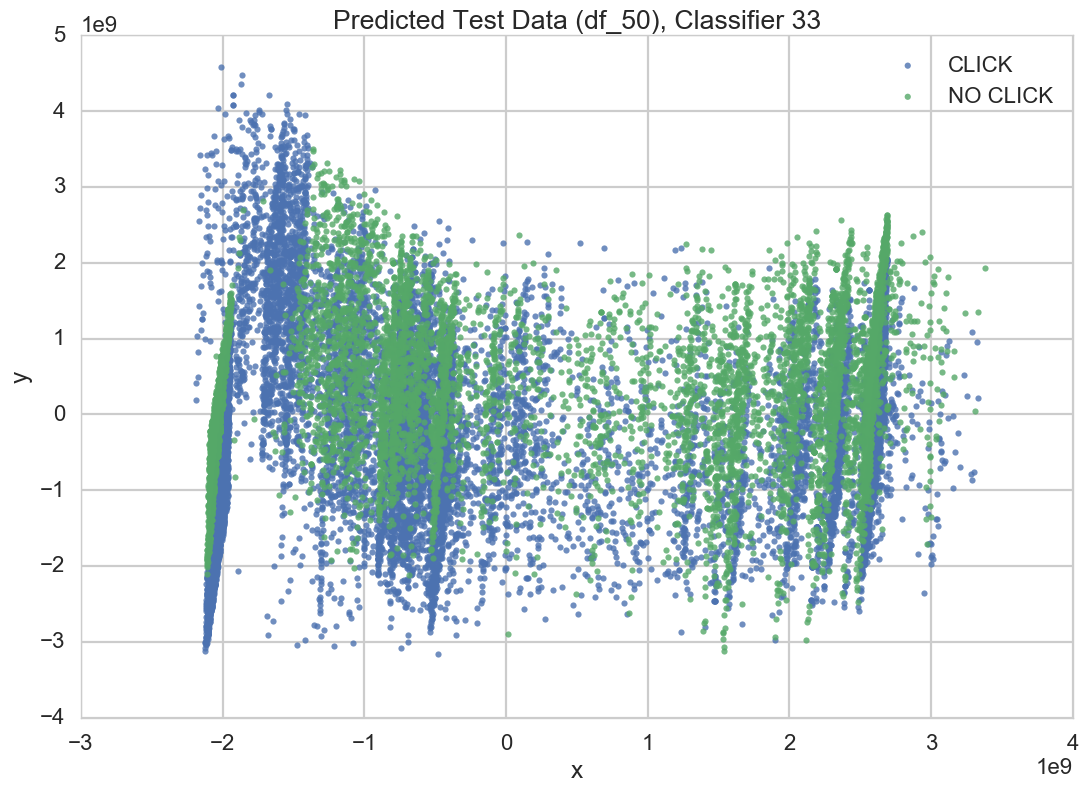

In [25]:
pu.plot_distribution(Xtest, ytest, clf_sgd_33, predicted=False, title="Actual Test Data (df_50), Classifier 33")
pu.plot_distribution(Xtest, ytest, clf_sgd_33, predicted=True, title="Predicted Test Data (df_50), Classifier 33")

### SGD20 Data Projection:

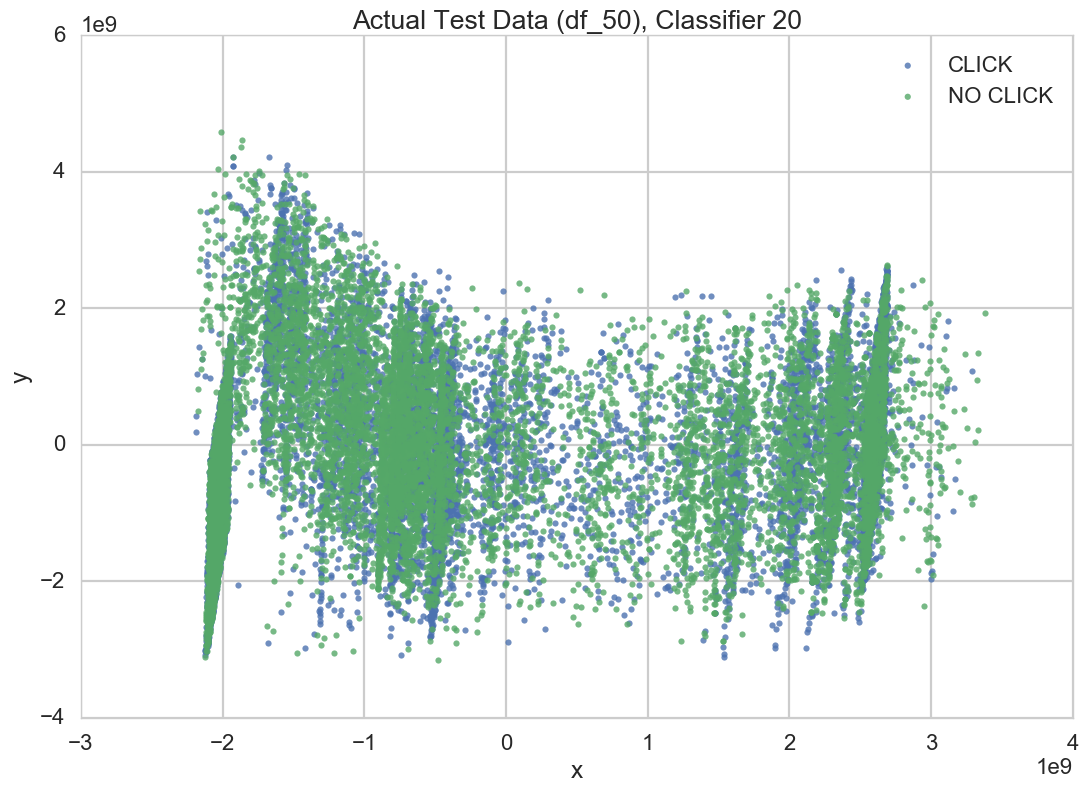

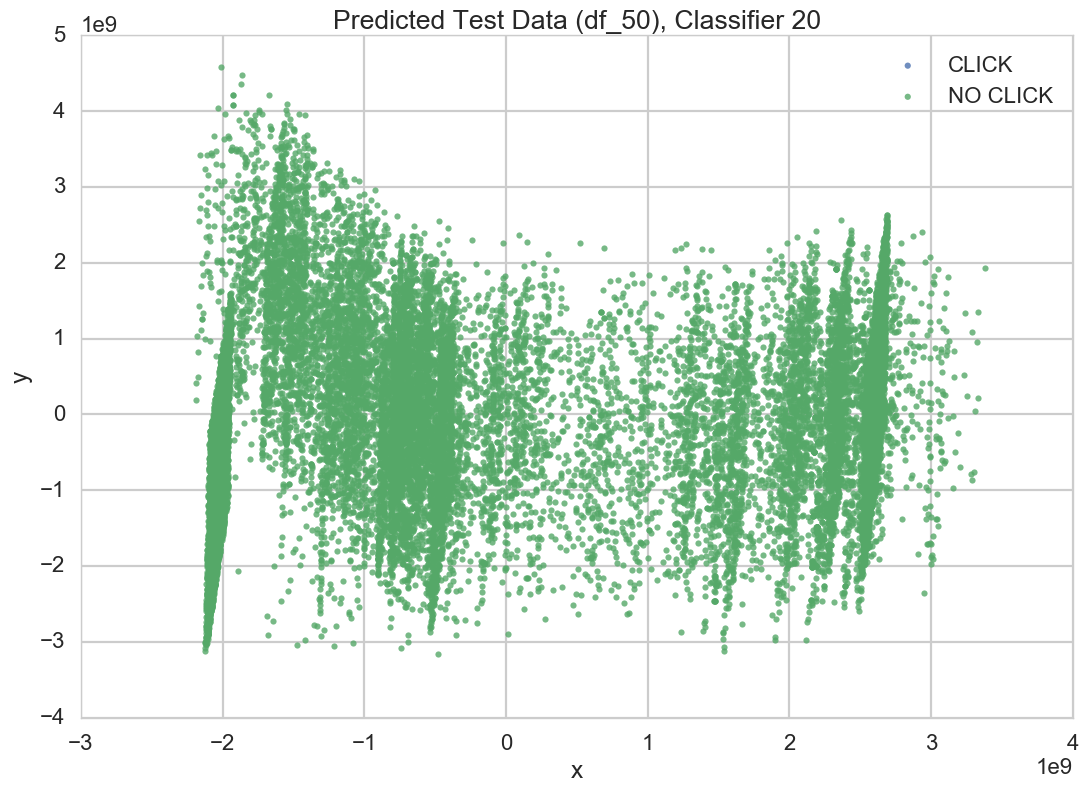

In [26]:
pu.plot_distribution(Xtest, ytest, clf_sgd_20, predicted=False, title="Actual Test Data (df_50), Classifier 20")
pu.plot_distribution(Xtest, ytest, clf_sgd_20, predicted=True, title="Predicted Test Data (df_50), Classifier 20")

## SGD Calibration Curve:

In [27]:
all_clfs = [(clf_sgd_50, 'SGD50'),
            (clf_sgd_33, 'SGD33'),
            (clf_sgd_20, 'SGD20')]

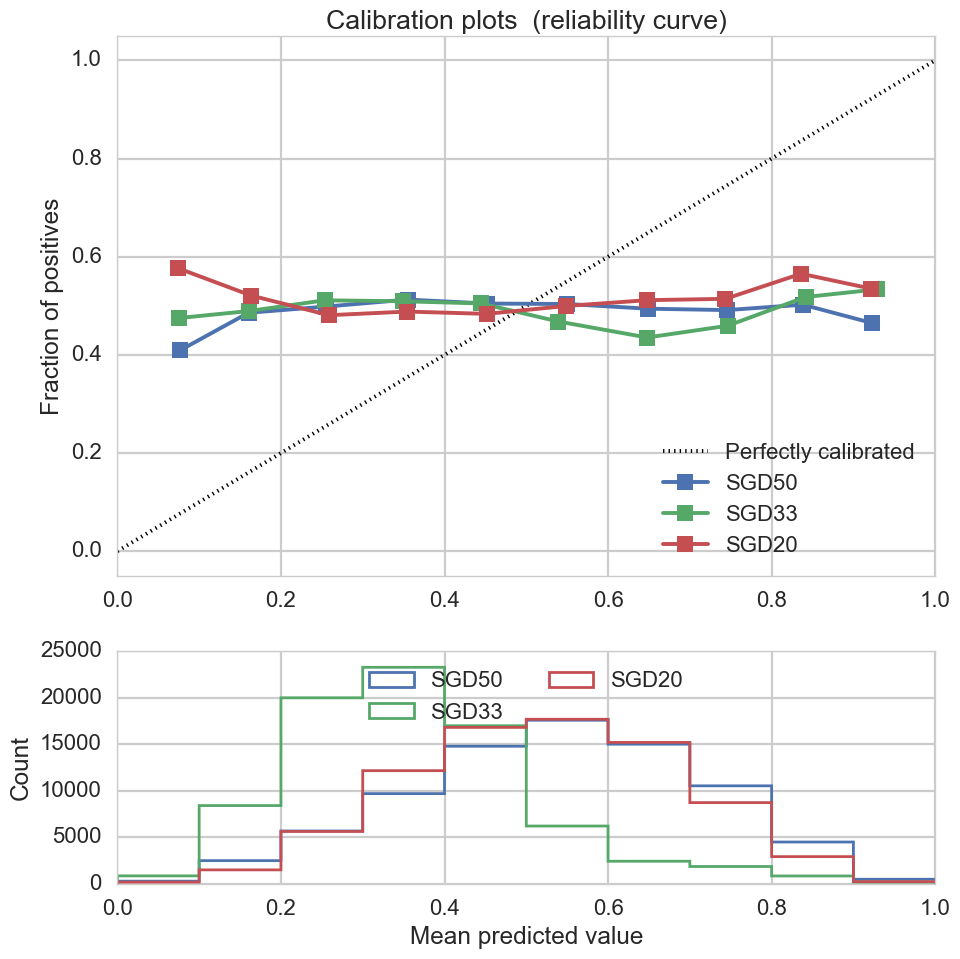

In [28]:
pu.calibration_plot(all_clfs, X50, y50)

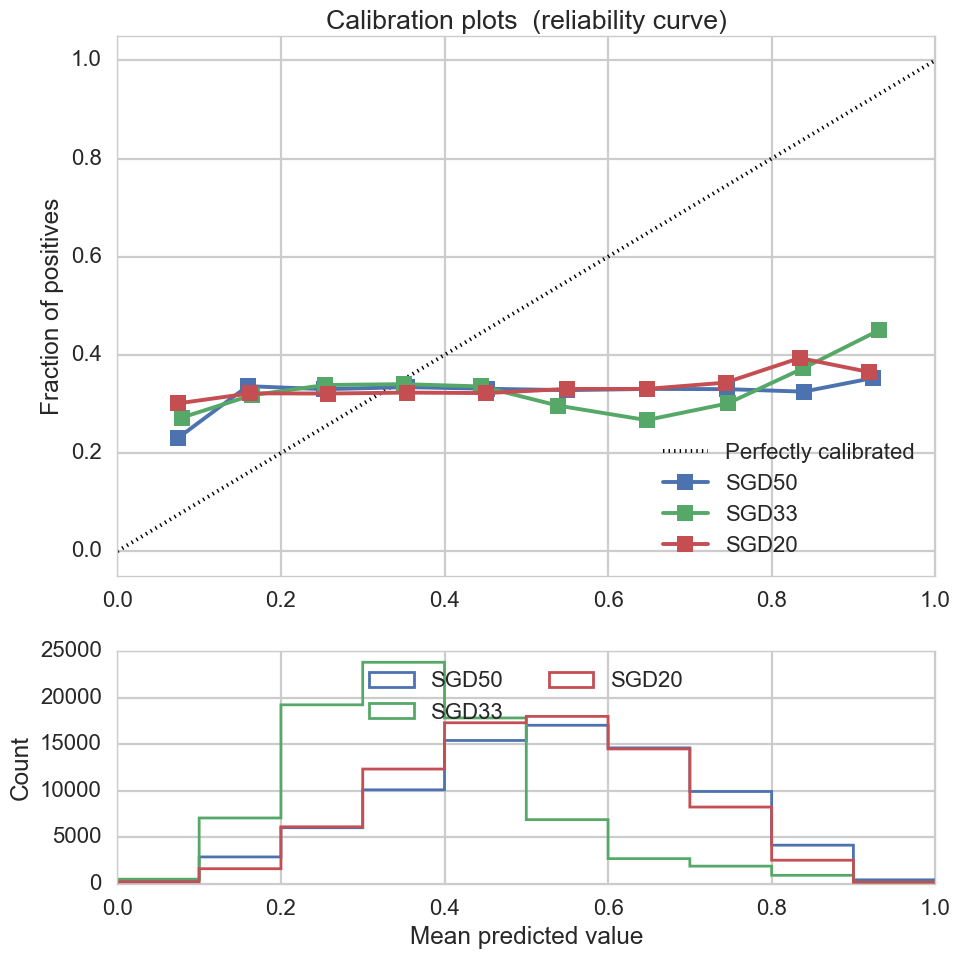

In [29]:
pu.calibration_plot(all_clfs, X33, y33)

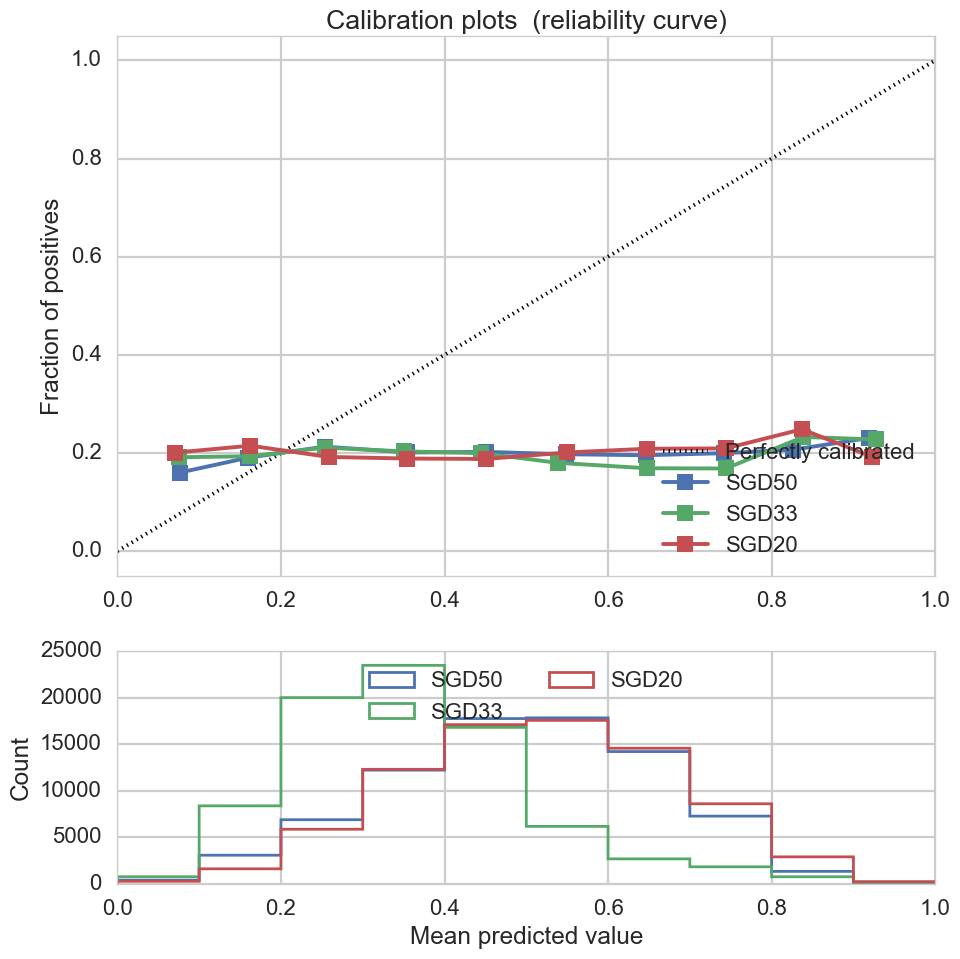

In [30]:
pu.calibration_plot(all_clfs, X20, y20)

## Observations:
From the above plots, confusion matrix and accuracy score, it can be infferred that SGD Classifier does not perform as well as LogisticRegression.  